Task 4:
# Linear Prediction

House Price prediction using the linear regression

In [2]:
#importing the required raries and housing.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [43]:
housing = pd.read_csv(r'F:\VS Code\Celebal Technology\week3\Housing.csv')

In [44]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [45]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [46]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [47]:
housing.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

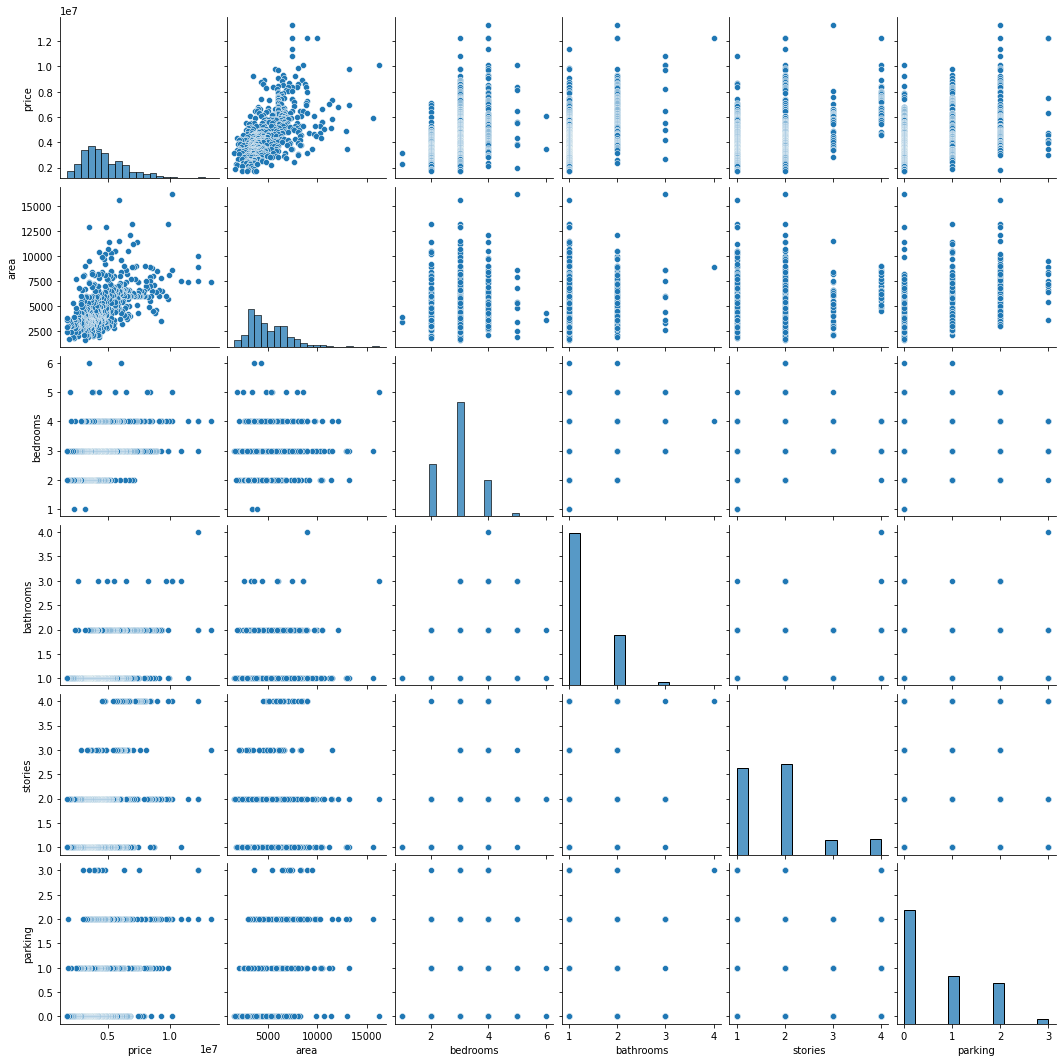

In [27]:
#data visualization
sns.pairplot(housing)

data preprocessing

In [48]:
#data preprocessng
categorical =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnishing = ['furnishingstatus']
housing[categorical] = housing[categorical].apply(lambda x: x.map({'yes': 1, 'no': 0}))
housing[furnishing] = housing[furnishing].apply(lambda x: x.map({'furnished':2, 'semi-furnished':1, 'unfurnished':0}))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [49]:
#splitting the data
X = housing.drop(['price'], axis=1)
y = housing['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
scaler = StandardScaler()
X_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']] = scaler.fit_transform(X_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
X_train.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,-0.736734,0.092755,-0.575844,-0.911674,1,0,0,0,0,0.318635,0,0
19,0.632894,0.092755,1.533738,0.219752,1,0,0,0,1,0.318635,1,1
159,-0.955291,0.092755,1.533738,-0.911674,1,1,1,0,1,-0.848672,0,2
35,0.914591,0.092755,1.533738,2.482604,1,0,0,0,1,1.485941,0,2
28,1.375990,2.811204,1.533738,0.219752,1,0,1,1,0,1.485941,0,0


Bulinding and training the model

In [50]:
# Model Building
lm = linear_model.LinearRegression()
from sklearn.feature_selection import RFE
rfe = RFE(lm,  n_features_to_select = 10)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe.head()

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
359,-0.736734,-0.575844,-0.911674,1,0,0,0,0,0.318635,0
19,0.632894,1.533738,0.219752,1,0,0,0,1,0.318635,1
159,-0.955291,1.533738,-0.911674,1,1,1,0,1,-0.848672,0
35,0.914591,1.533738,2.482604,1,0,0,0,1,1.485941,0
28,1.375990,1.533738,0.219752,1,0,1,1,0,1.485941,0


evaluating model performance

In [51]:
#evaluating model performance
def model_performance():
    # Train the model on training data and predict using test data
    lm.fit(X_train_rfe, y_train)
    y_pred = lm.predict(X_test[col])
    # Calculate root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Return the score
    return rmse
model_performance()

2865359569.3302016

In [55]:
# printing performance matrix
from sklearn.metrics import r2_score
def performance_matrix():
    # Train the model on training data and predict using test data
    lm.fit(X_train_rfe, y_train)
    y_pred = lm.predict(X_test[col])
    # Calculate root mean squared error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # Calculate r2 score
    r2 = r2_score(y_test, y_pred)
    # Return the score
    return rmse, r2
performance_matrix()

(2865359569.3302016, -2091252.2071737456)

Text(0, 0.5, 'Predicted')

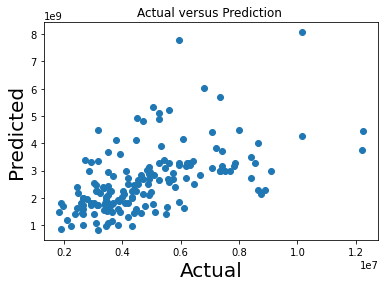

In [59]:
y_pred = lm.predict(X_test[col])
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)
plt.ylabel('Predicted', fontsize=20)